<a href="https://colab.research.google.com/github/Zem-0/Unemployment_analysis/blob/main/unemployed_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [ ]:
df =pd.read_csv("/content/Unemployment in India.csv")

In [ ]:
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [ ]:
df.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                                   72.570000

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

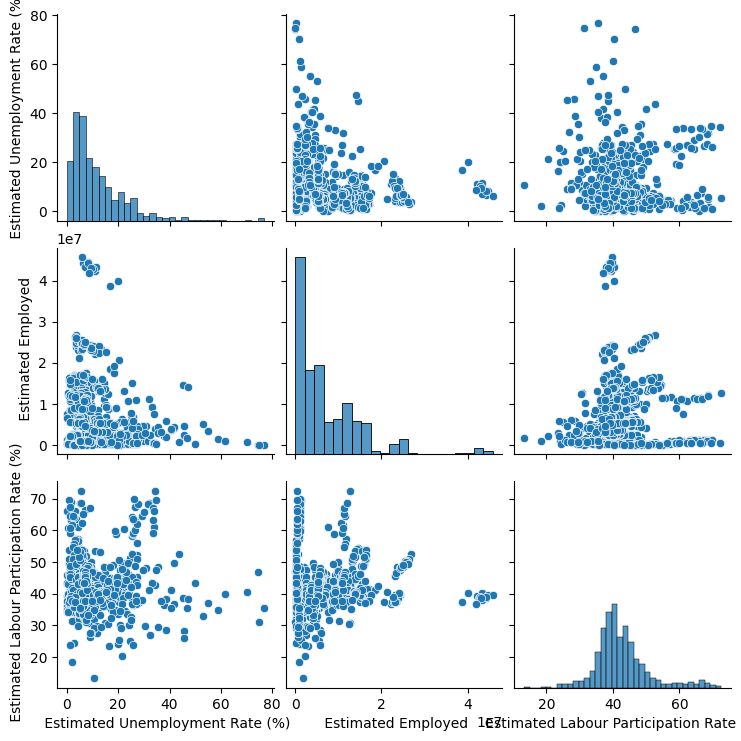

In [ ]:
sns.pairplot(df)

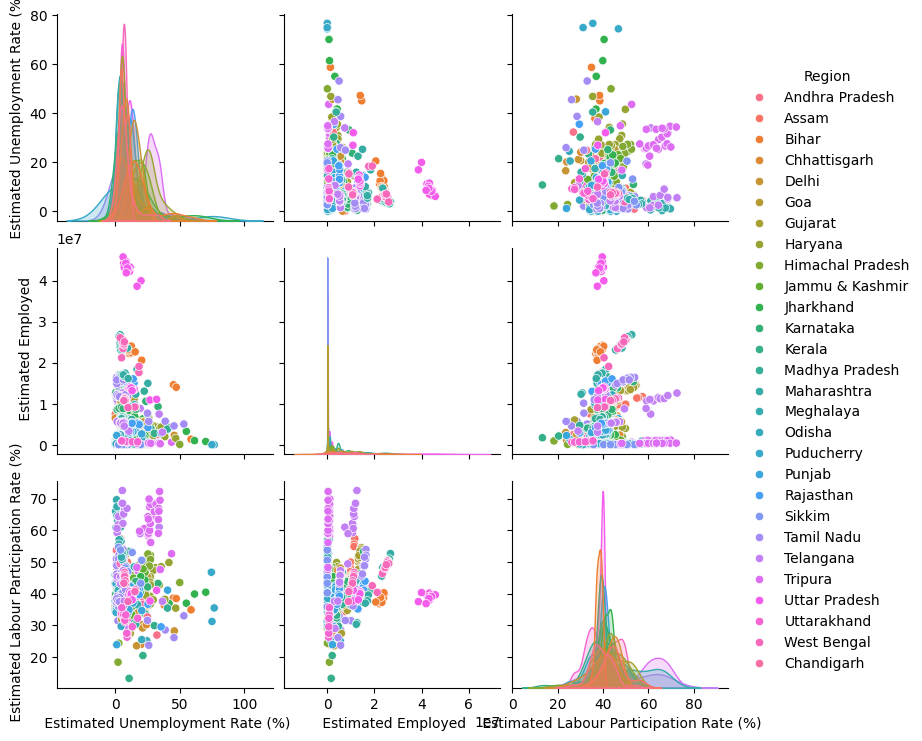

In [ ]:
sns.pairplot(data = df , hue = 'Region')

<Axes: ylabel='count'>

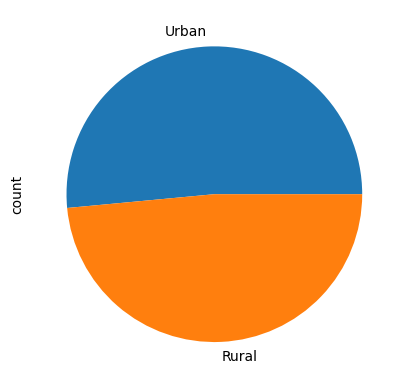

In [ ]:
df['Area'].value_counts().plot.pie()

<Axes: ylabel='count'>

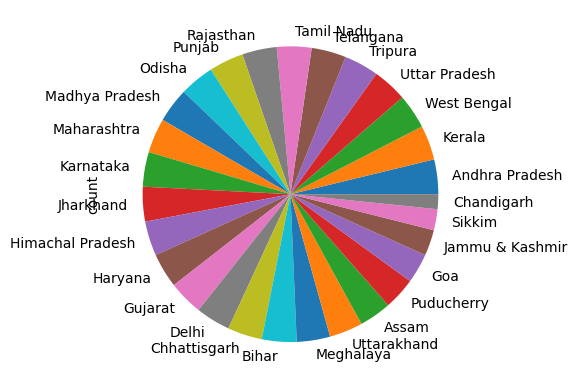

In [ ]:
df['Region'].value_counts().plot.pie()

<Axes: xlabel='Area'>

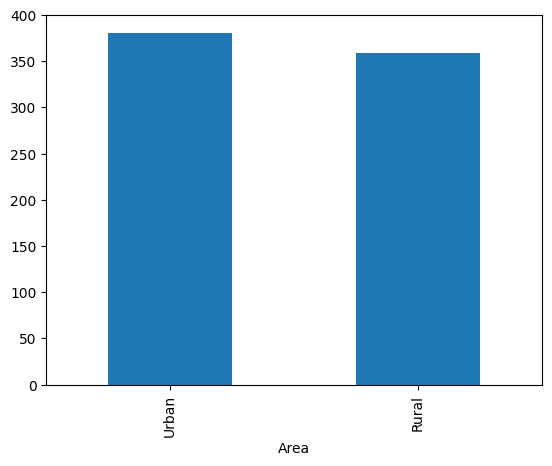

In [ ]:
df['Area'].value_counts().plot.bar()

In [ ]:
df = df.rename(columns={'Region' : 'States', ' Date' : 'Date',' Frequency': 'Frequency' ,
                        ' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp',
                        ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)

In [ ]:

df['Est_Emp'] = round((df['Est_Emp']/1000000),2)

df.head(5)

States         Date Frequency  Est_Unemp_Rate  Est_Emp  \
0  Andhra Pradesh   31-05-2019   Monthly            3.65    12.00   
1  Andhra Pradesh   30-06-2019   Monthly            3.05    11.76   
2  Andhra Pradesh   31-07-2019   Monthly            3.75    12.09   
3  Andhra Pradesh   31-08-2019   Monthly            3.32    12.29   
4  Andhra Pradesh   30-09-2019   Monthly            5.17    12.26   

   Est_Labour_Rate   Area  
0            43.24  Rural  
1            42.05  Rural  
2            43.50  Rural  
3            43.97  Rural  
4            44.68  Rural

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   States           740 non-null    object 
 1   Date             740 non-null    object 
 2   Frequency        740 non-null    object 
 3   Est_Unemp_Rate   740 non-null    float64
 4   Est_Emp          740 non-null    float64
 5   Est_Labour_Rate  740 non-null    float64
 6   Area             740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 40.6+ KB


In [ ]:
df.isnull().sum()

States             1
Date               1
Frequency          1
Est_Unemp_Rate     1
Est_Emp            1
Est_Labour_Rate    1
Area               1
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-23-b9c6864122be>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:

df_stat = df[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(df_stat.describe(),2)

Est_Unemp_Rate  Est_Emp  Est_Labour_Rate
count          740.00   740.00           740.00
mean            11.79     7.20            42.63
std             10.72     8.09             8.11
min              0.00     0.05            13.33
25%              4.66     1.19            38.06
50%              8.35     4.74            41.16
75%             15.89    11.28            45.50
max             76.74    45.78            72.57

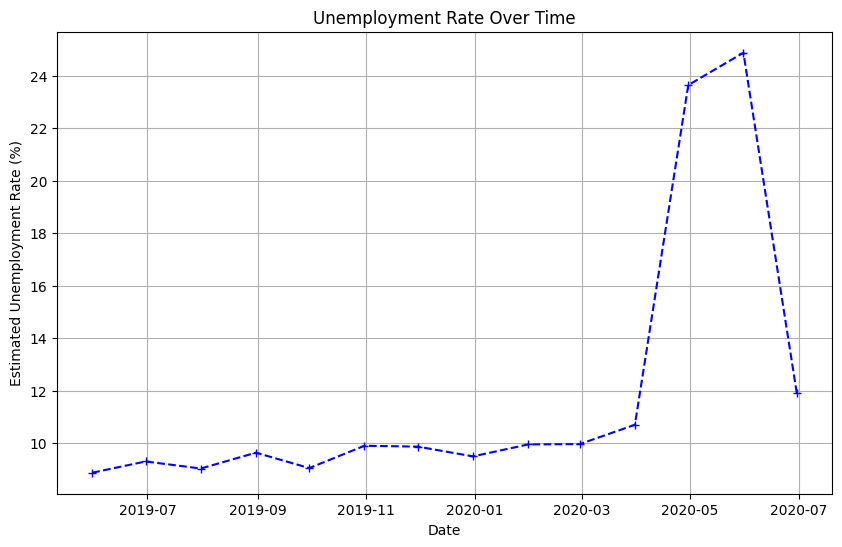

In [ ]:

mean_unemployment_over_time = df.groupby('Date')['Est_Unemp_Rate'].mean()

# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='+', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

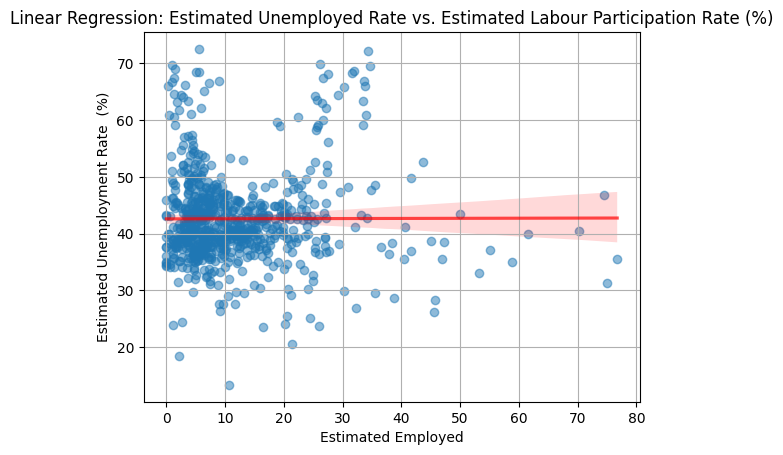

In [ ]:
sns.regplot(x='Est_Unemp_Rate',y='Est_Labour_Rate', data=df,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.ylabel('Estimated Unemployment Rate  (%)')
plt.xlabel('Estimated Employed')
plt.title('Linear Regression: Estimated Unemployed Rate vs. Estimated Labour Participation Rate (%)')
plt.grid(True)

In [ ]:
import plotly.express as px
unemployment = df[['States', 'Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
unemployment = unemployment.groupby(['States'])['Est_Unemp_Rate'].mean().reset_index()
fig = px.sunburst(unemployment, path=['States'], values = 'Est_Unemp_Rate', title='Unemployment rate in each State and Region',height=850)
fig.show()